# Algorithmisches Handeln mit Technischen Indikator | MACD | Python mit Finance

In [2]:
# Beschreibung: Dieses Programm führt algorithmisches Handeln anhand eines technischen Indikators aus. 
# Der technische Indikator ist MACD. Welcher aus zwei gleitenden Durchschnitten besteht


In [9]:
conda install -c anaconda pandas-datareader

Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - pandas-datareader


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.6.24  |                0         132 KB  anaconda
    certifi-2020.6.20          |           py38_0         159 KB  anaconda
    conda-4.10.3               |   py38hecd8cb5_0         2.9 MB
    openssl-1.1.1g             |       h1de35cc_0         3.4 MB  anaconda
    pandas-datareader-0.9.0    |             py_0          72 KB  anaconda
    ------------------------------------------------------------
                                           Total:         6.7 MB

The following NEW packages will be INSTALLED:

  pandas-datareader  anaconda/noarch::pandas-datareader-0.9.0-py_0

The following packages will be UPDATED:

  conda                               4.10.1-py38hecd8cb5_1 --> 4.

In [9]:
import pandas as pd
import pandas_datareader as web
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
pip install --upgrade pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [10]:
df = web.DataReader("AMZN", data_source="yahoo", start = "2018-01-01", end = "2020-01-01")

In [11]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,1190.000000,1170.510010,1172.000000,1189.010010,2694500,1189.010010
2018-01-03,1205.489990,1188.300049,1188.300049,1204.199951,3108800,1204.199951
2018-01-04,1215.869995,1204.660034,1205.000000,1209.589966,3022100,1209.589966
2018-01-05,1229.140015,1210.000000,1217.510010,1229.140015,3544700,1229.140015
2018-01-08,1253.079956,1232.030029,1236.000000,1246.869995,4279500,1246.869995
...,...,...,...,...,...,...
2019-12-24,1795.569946,1787.579956,1793.810059,1789.209961,881300,1789.209961
2019-12-26,1870.459961,1799.500000,1801.010010,1868.770020,6005400,1868.770020
2019-12-27,1901.400024,1866.010010,1882.920044,1869.800049,6186600,1869.800049


In [16]:
#benötigt wird der adjusted Close
#Berechnung des MACD

#langsame gleitende Durchschnitt
ema_26 = df["Adj Close"].ewm(span=26, adjust = False).mean()

#Schneller gleitender Durchschnitt
ema_12 = df["Adj Close"].ewm(span=12, adjust = False).mean()

#MACD Linie = Schnelle gleitende Durchschnitt - langsamer gleitender Durchschnitt
MACD = ema_12 - ema_26

#Signallinie 
signal = MACD.ewm(span = 9, adjust = False).mean()

In [17]:
df["MACD"] = MACD
df["Signal"] = signal

In [18]:
df

,High,Low,Open,Close,Volume,Adj Close,MACD,Signal
Date,,,,,,,,
2018-01-02,1190.000000,1170.510010,1172.000000,1189.010010,2694500,1189.010010,0.000000,0.000000
2018-01-03,1205.489990,1188.300049,1188.300049,1204.199951,3108800,1204.199951,1.211733,0.242347
2018-01-04,1215.869995,1204.660034,1205.000000,1209.589966,3022100,1209.589966,2.577261,0.709329
2018-01-05,1229.140015,1210.000000,1217.510010,1229.140015,3544700,1229.140015,5.177296,1.602923
2018-01-08,1253.079956,1232.030029,1236.000000,1246.869995,4279500,1246.869995,8.569717,2.996282
...,...,...,...,...,...,...,...,...
2019-12-24,1795.569946,1787.579956,1793.810059,1789.209961,881300,1789.209961,5.688908,1.996157
2019-12-26,1870.459961,1799.500000,1801.010010,1868.770020,6005400,1868.770020,12.442558,4.085437
2019-12-27,1901.400024,1866.010010,1882.920044,1869.800049,6186600,1869.800049,17.674251,6.803200


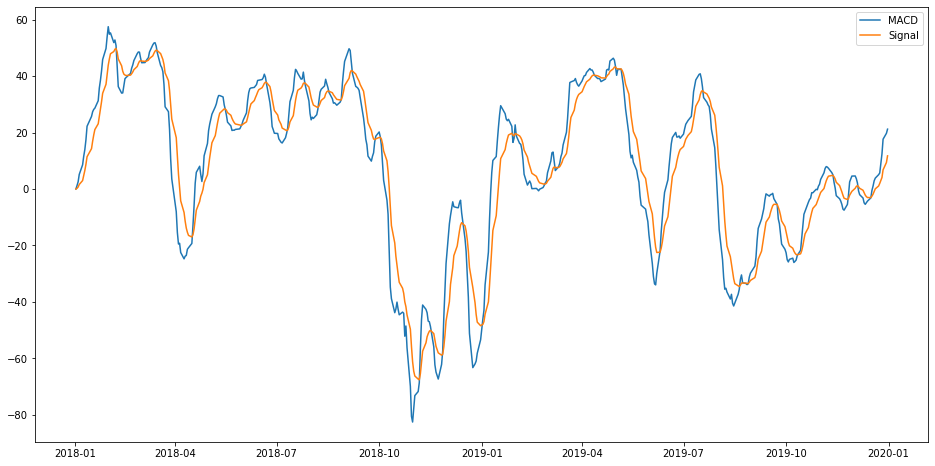

In [19]:
plt.figure(figsize=(16,8))
plt.plot(df["MACD"], label = "MACD")
plt.plot(df["Signal"], label = "Signal")
plt.legend()
plt.show()

In [ ]:
#MACD sagt aus, sobald sich diese Linien kreuzen kauft oder verlauft man
#Beipsiel: Wenn die MACD Linie von oben nach unten die Signallinie kreuzt 
#und auch anders herum, sind das Indikatoren für eine Kauf oder Verkauf Entscheidung.

In [23]:
def get_signal(data):
    Buy = []
    Sell = []
    flag = -1 #Prüfung in der Vorschleife, ob ein Punkt schon mal erreicht wurde
    
    for i in range(0, len(data)):
        #Prüfung ob MACD > als die Signallinie, dann soll nichts in Sell geschrieben werden
        if data["MACD"][i] > data["Signal"][i]:
            Sell.append(np.nan)
            if flag != 1:      #waren wir an diesem Punkt?
                Buy.append(data["Adj Close"][i])#ist das nicht der Fall gewesen, wird der Preis in die Bye Liste geschrieben
                flag = 1 #damit man nicht nochmal in die Schleife geht, da if Statement ungleich 1
            else:
                Buy.append(np.nan)
        elif data["MACD"][i] < data["Signal"][i]:
            Buy.append(np.nan)
            if flag != 0:
                Sell.append(data["Adj Close"][i])
                flag = 0 
            else: Sell.append(np.nan)
        else:
            Buy.append(np.nan)
            Sell.append(np.nan)
    return(Buy, Sell)

In [24]:
x = get_signal(df)

In [25]:
x

([nan,
  1204.199951171875,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  1468.3499755859375,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  1537.6400146484375,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  1503.8299560546875,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  1629.6199951171875,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  1755.0,

In [ ]:
# Listen dem DF hinzufügen

In [26]:
df["Buy_signal"]=x[0]
df["Sell_signal"]=x[1]

In [27]:
df

,High,Low,Open,Close,Volume,Adj Close,MACD,Signal,Buy_signal,Sell_signal
Date,,,,,,,,,,
2018-01-02,1190.000000,1170.510010,1172.000000,1189.010010,2694500,1189.010010,0.000000,0.000000,NaN,NaN
2018-01-03,1205.489990,1188.300049,1188.300049,1204.199951,3108800,1204.199951,1.211733,0.242347,1204.199951,NaN
2018-01-04,1215.869995,1204.660034,1205.000000,1209.589966,3022100,1209.589966,2.577261,0.709329,NaN,NaN
2018-01-05,1229.140015,1210.000000,1217.510010,1229.140015,3544700,1229.140015,5.177296,1.602923,NaN,NaN
2018-01-08,1253.079956,1232.030029,1236.000000,1246.869995,4279500,1246.869995,8.569717,2.996282,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2019-12-24,1795.569946,1787.579956,1793.810059,1789.209961,881300,1789.209961,5.688908,1.996157,NaN,NaN
2019-12-26,1870.459961,1799.500000,1801.010010,1868.770020,6005400,1868.770020,12.442558,4.085437,NaN,NaN
2019-12-27,1901.400024,1866.010010,1882.920044,1869.800049,6186600,1869.800049,17.674251,6.803200,NaN,NaN


In [28]:
# an dem Punkt 	1204.199951 kaufen zum Adj. Close Preis von 1204.199951

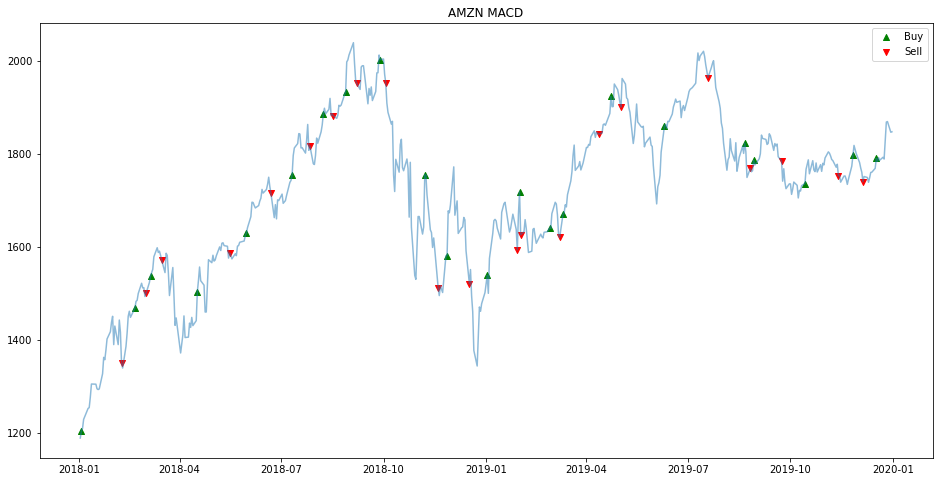

In [31]:
plt.figure(figsize=(16,8))
plt.scatter(df.index, df["Buy_signal"], color = "green", label = "Buy", marker = "^", alpha =1)
plt.scatter(df.index, df["Sell_signal"], color = "red", label = "Sell", marker = "v", alpha =1)
plt.plot(df.index, df["Adj Close"], alpha = 0.5)
plt.title("AMZN MACD")
plt.legend()
plt.show()

In [ ]:
#hellblaue Linie = Adj. Close
#MACD hat sich mit der Signallinie am Anfang gekreuzt und bedeutet das gekauft werden soll
#Technischen Indikator auf aktuelle Daten anwenden
# Es wird nur gekauft, wenn das kurze MA das Lange MA von negativ ins positive schneidet. 